Here I generate some synthetic 2d (1d data + label) data and then use linear regression on the data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Generate some data with proper values of w_0 and w_1
Given some x
y takes the form
y= w_0+w_1*x;

Purpose given a bunch of x values and corresponding y values, I want to learn my w_0 and w_1
x= [1 2 150 1 1.2]
y= 2500000

y= w_0(1)+ w_1(2)+ w_2(150)+....



In [ ]:
X = 2 * np.random.rand(100,1)
y = 5 + 8 * X +np.random.rand(100,1)



w_0 = 6 and w_1=3
to the labels I have added random noise

Plot the data


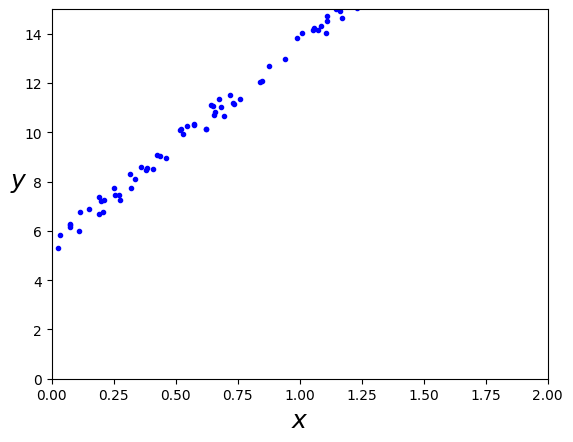

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

w_0 is multiplying with the value 1,
if your data was say x =[20000],
since I am using the bias term the overall effect is like
x_b= [1 20000]
w=[w_0 w_1]

w_best = (X^TX)^-1 (X^Ty)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_best)

[[5.]
 [8.]]


Below the same linear Regression is implemented using Python sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

Typical steps in sklearn
1.Model
2.Fit
3.Transform/Predict

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

Fit step will use the training data

In [ ]:
reg.coef_

array([[8.00838848]])

In [ ]:
reg.intercept_

array([5.53221562])

Predicting on new data and plotting

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(w_best)
y_predict

array([[ 5.],
       [21.]])

(0.0, 2.0, 0.0, 15.0)

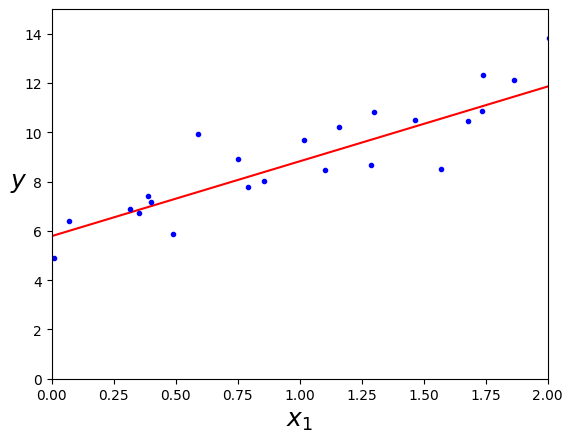

In [ ]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


Implementing Logistic Regression on the breast cancer dataset


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
X,y = load_breast_cancer(return_X_y = True)

In [ ]:
X[50],y[50]

(array([1.176e+01, 2.160e+01, 7.472e+01, 4.279e+02, 8.637e-02, 4.966e-02,
        1.657e-02, 1.115e-02, 1.495e-01, 5.888e-02, 4.062e-01, 1.210e+00,
        2.635e+00, 2.847e+01, 5.857e-03, 9.758e-03, 1.168e-02, 7.445e-03,
        2.406e-02, 1.769e-03, 1.298e+01, 2.572e+01, 8.298e+01, 5.165e+02,
        1.085e-01, 8.615e-02, 5.523e-02, 3.715e-02, 2.433e-01, 6.563e-02]),
 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[1], y_train[1]

(array([-0.71766069, -0.22131541, -0.70228899, -0.70500943,  1.36813763,
        -0.02513728, -0.2155511 , -0.35689103, -0.01598413,  0.39050653,
        -0.36530886,  0.77554801, -0.35729565, -0.46098117,  0.49449275,
        -0.10502041, -0.07573659,  0.36186143, -0.57048367,  0.04023811,
        -0.66144165,  0.58079204, -0.66055587, -0.65214927,  1.62332396,
         0.10806901,  0.08672146,  0.13372742, -0.14065018,  0.45177473]),
 1)

In [ ]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158